In [1]:
# Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt




In [101]:
# Data collection process to import data from API to excel, don't need to runt this. Just for reference

# import eikon as ek
# ek.set_app_key('153df6af7d1f4a1daa64764ffe8b0a61191847a4')
# csv = pd.read_csv("sp500.csv")
# def turn_to_RIC(x):
#     returned_values = ek.get_symbology(x,from_symbol_type="ticker",to_symbol_type="RIC",best_match=False)
#     if returned_values["bestMatch"].iloc[0].get("error"):
#         print(returned_values["RICs"].iloc[0][0])
#         return returned_values["RICs"].iloc[0][0]
#     else:
#         return returned_values["bestMatch"].iloc[0].get("RIC")
# new_symbols = csv['Symbol'].apply(turn_to_RIC)







In [27]:
# Data collection process to import data from API to excel, don't need to runt this. Just for reference

# csv['Symbol'] = new_symbols
# csv.to_csv("sp500_updated.csv")

In [102]:
# Data collection process to import data from API to excel, don't need to runt this. Just for reference

# csv = pd.read_csv("sp500_updated.csv")
# csv

In [80]:
# Data collection process to import data from API to excel, don't need to runt this. Just for reference

# esg_data = pd.DataFrame([])
# def get_esg_data_sp500(x):
#     global esg_data
#     esg_data =pd.concat([esg_data,ek.get_data(x,["TR.CSRReporting","TR.CSRReportingScope","TR.TRESGCScore","TR.TRESGScore",
#                       "TR.EnvironmentPillarScore","TR.SocialPillarScore","TR.GovernancePillarScore",
#                       "TR.TRESGCControversiesScore"])[0]],ignore_index=True)
#     return x

# csv['Symbol'].apply(get_esg_data_sp500)
# esg_data.to_csv("sp_500_esg_scores.csv")








<BarContainer object of 6 artists>

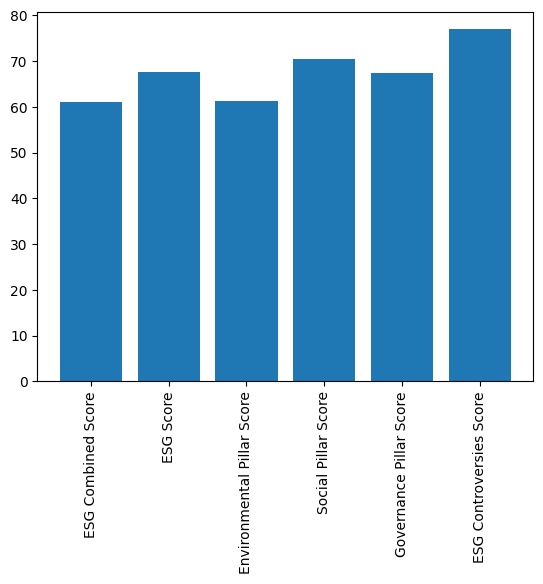

In [91]:
# Mean of ESG scores of SP500 companies

esg_data = pd.read_csv("sp_500_esg_scores.csv")
esg_data = esg_data.drop(labels="Unnamed: 0", axis=1)


mean_of_scores = esg_data[['ESG Combined Score','ESG Score','Environmental Pillar Score',
                 "Social Pillar Score","Governance Pillar Score","ESG Controversies Score"]].mean()


plt.xticks(rotation='vertical')

plt.bar(mean_of_scores.index, mean_of_scores.iloc[:])

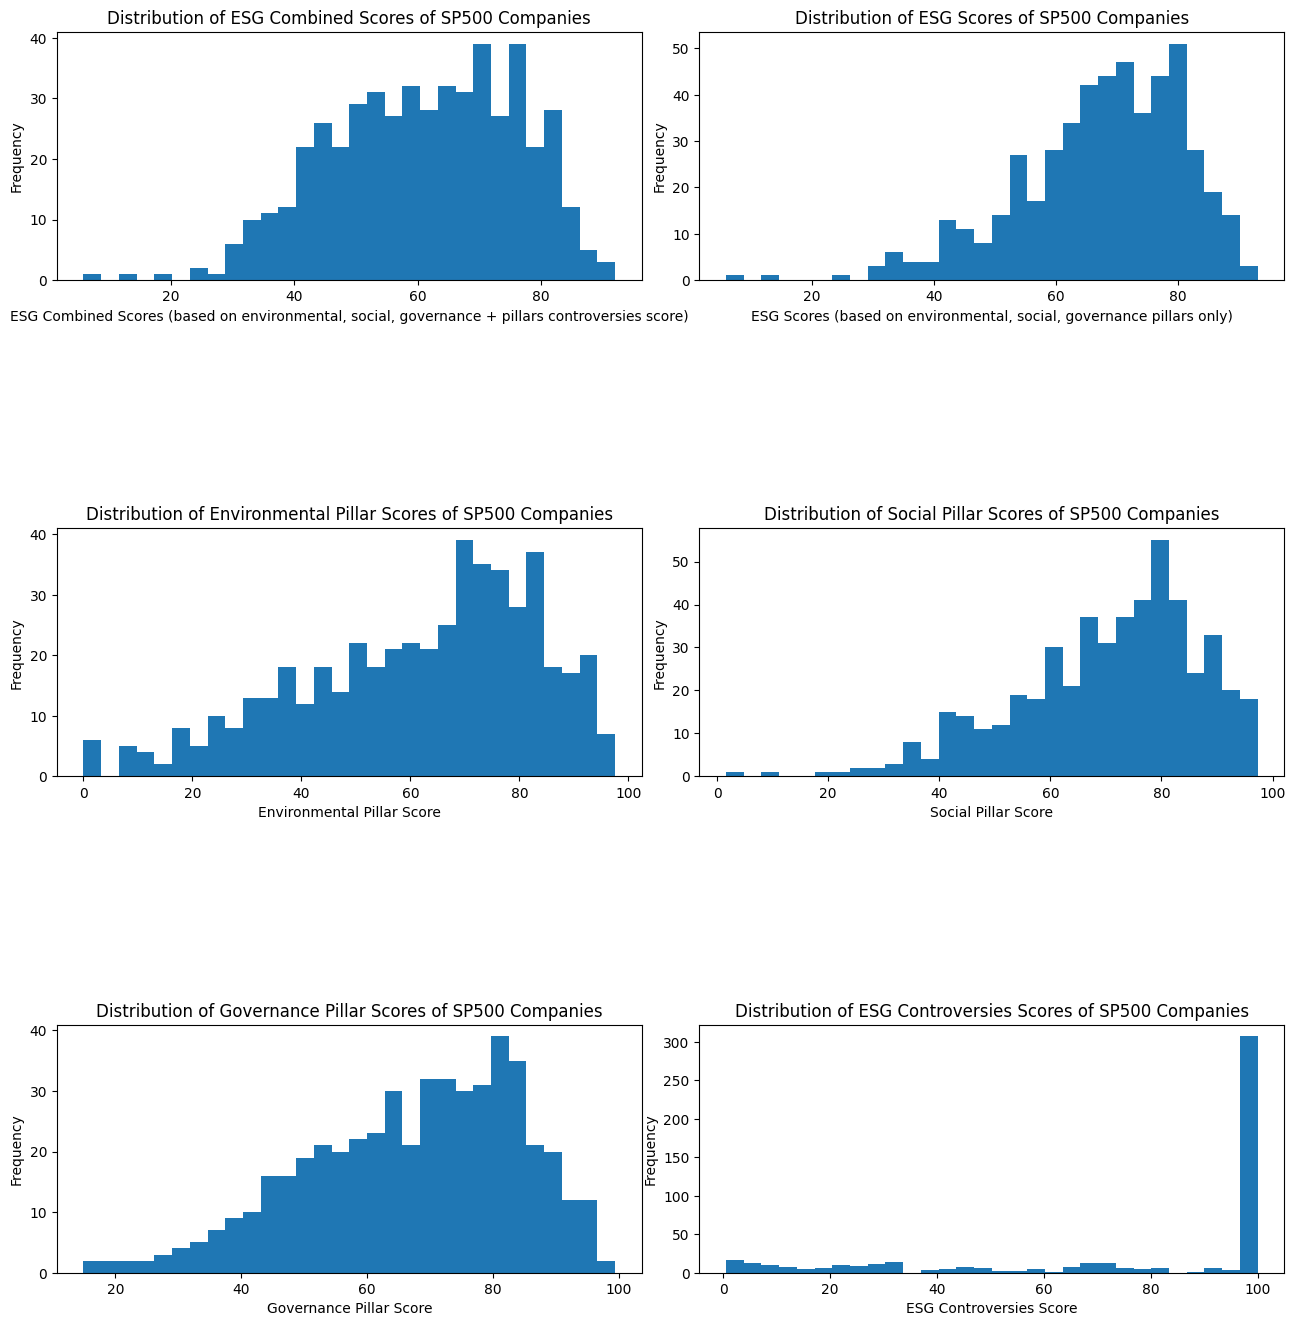

In [100]:
# Distribution of ESG scores of SP500 companies

fig, (ax1,ax2,ax3) = plt.subplots(nrows=3,ncols=2,figsize=(13, 13))
fig.tight_layout()
plt.tight_layout()
fig.subplots_adjust(hspace=1)

axes = [ax1,ax2,ax3]
score_names  = [['ESG Combined Score','ESG Score'],
           ['Environmental Pillar Score',"Social Pillar Score"],
           ["Governance Pillar Score","ESG Controversies Score"]]

titles = [['Distribution of ESG Combined Scores of SP500 Companies',
         "Distribution of ESG Scores of SP500 Companies"],
         ["Distribution of Environmental Pillar Scores of SP500 Companies",
         "Distribution of Social Pillar Scores of SP500 Companies"],
         ["Distribution of Governance Pillar Scores of SP500 Companies",
         "Distribution of ESG Controversies Scores of SP500 Companies"]]
xlabels = [['ESG Combined Scores (based on environmental, social, governance + pillars controversies score)',
          'ESG Scores (based on environmental, social, governance pillars only)'],
          ['Environmental Pillar Score',
          'Social Pillar Score'],
          ['Governance Pillar Score',
          'ESG Controversies Score']]

for i in range(3):
    for j in range(2):
        scores = esg_data[score_names[i][j]].tolist()
        axes[i][j].hist(scores,bins=30)
        axes[i][j].set_xlabel(xlabels[i][j])
        axes[i][j].set_ylabel("Frequency")
        axes[i][j].set_title(titles[i][j])
        
# Most scores are skewed towards 60-80 range, however 
# more than half of the controversy scores are 100, the rest are spread widely across 0-99


